In [8]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
plt.style.use("fivethirtyeight")
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
pickle_in = open("../data/pickles/training_features.pickle","rb")
train2 = pickle.load(pickle_in)
pickle_in = open("../data/pickles/validate_features.pickle","rb")
validate2 = pickle.load(pickle_in)

In [4]:
X_train2 = train2.drop(["default"], axis=1)
y_tr = train2["default"]
X_validate2 = validate2.drop(["default"], axis=1)
y_val = validate2["default"]

In [7]:
scaler2 = StandardScaler().fit(X_train2)
X_tr2 = scaler2.transform(X_train2)
X_val2 = scaler2.transform(X_validate2)

In [9]:
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(X_train2)

In [10]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[35467563.26857428 17187176.1457454   1831494.77310567]
[[ 4.89526718e-01 -1.45730065e-06 -1.09321456e-05 -5.89158350e-06
   1.53327640e-04  1.05019153e-05  1.62879498e-05  1.73063950e-05
   1.88032510e-05  2.10295216e-05  2.32943263e-05  3.87579598e-01
   3.81736130e-01  3.72759043e-01  3.46097329e-01  3.24226659e-01
   3.10001423e-01  2.79874578e-02  3.32507943e-02  2.88915644e-02
   2.36539218e-02  2.29368360e-02  2.56400578e-02  1.17451577e-05
  -1.58323609e-05 -1.62315032e-05 -1.72776144e-05 -1.88267388e-05
  -1.88084833e-05 -1.87436217e-05 -1.76200537e-05 -9.84806036e-06
  -2.08730728e-05 -2.93826346e-05 -6.80758344e-05  1.09518082e-04
   9.12078142e-06 -1.05719506e-05]
 [ 8.70065203e-01  4.84673928e-06 -4.15931494e-05 -1.18252936e-05
   2.45131844e-04 -1.06352407e-04 -1.30201634e-04 -1.26103794e-04
  -1.20268517e-04 -1.13033859e-04 -1.12189105e-04 -2.20667180e-01
  -2.25850352e-01 -2.16214963e-01 -1.93165366e-01 -1.75514777e-01
  -1.66330478e-01  5.95679951e-03  9.97717950e-03  

In [11]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

In [12]:
str_loading_1 = pc1* np.sqrt(eig_values[0])
loading_1 = pd.Series(str_loading_1, index=X_train2.columns.to_list())
loading_1.sort_values(ascending=False)

limit        2915.359229
billed1      2308.216728
billed2      2273.416159
billed3      2219.953434
billed4      2061.170525
billed5      1930.920514
billed6      1846.202622
paid2         198.023941
paid3         172.062700
paid1         166.678325
paid6         152.698466
paid4         140.870103
paid5         136.599524
age             0.913137
pperb3          0.652231
behind6         0.138729
behind5         0.125241
behind4         0.111982
behind3         0.103068
behind2         0.097002
age_bin         0.069948
behind1         0.062544
pperb4          0.054318
gender         -0.008679
marriage       -0.035087
delayed        -0.058650
pperb5         -0.062961
education      -0.065106
avail6         -0.094289
avail5         -0.096666
avail4         -0.102896
avg_av         -0.104936
avail1         -0.111627
avail2         -0.112013
avail3         -0.112122
latemths       -0.124309
pperb1         -0.174987
pperb2         -0.405423
dtype: float64

Credit Limit - Billed Amount

In [13]:
str_loading_2 = pc2 * np.sqrt(eig_values[1])
loading_2 = pd.Series(str_loading_2, index=X_train2.columns.to_list())
loading_2.sort_values(ascending=False)

limit        3607.065793
paid6          62.190385
paid5          50.137561
paid3          46.067219
paid4          45.412275
paid2          41.362811
paid1          24.695353
age             1.016253
avail1          0.288830
avail2          0.287871
avail3          0.277289
avg_av          0.259801
avail4          0.252469
avail5          0.232007
avail6          0.220339
pperb4          0.195357
pperb5          0.194588
pperb1          0.178597
pperb2          0.164381
age_bin         0.086622
gender          0.020093
marriage       -0.049025
delayed        -0.079107
education      -0.172434
latemths       -0.367466
behind1        -0.440910
behind6        -0.465107
behind5        -0.468609
behind4        -0.498602
behind3        -0.522794
behind2        -0.539782
pperb3         -4.449186
billed6      -689.563235
billed5      -727.638970
billed4      -800.813759
billed3      -896.371438
billed1      -914.829180
billed2      -936.317274
dtype: float64

Credit Limit - Negative Billed

In [14]:
str_loading_3 = pc3 * np.sqrt(eig_values[2])
loading_3 = pd.Series(str_loading_3, index=X_train2.columns.to_list())
loading_3.sort_values(ascending=False)

billed6      637.870937
billed5      572.587262
billed4      352.842445
paid2        257.650585
paid3        211.488740
paid4        142.393506
paid5         77.794410
paid1         75.541296
pperb4         0.201538
pperb2         0.173631
behind6        0.163174
latemths       0.156863
pperb1         0.130094
behind5        0.123702
avail1         0.093702
behind4        0.076314
avail2         0.066853
delayed        0.040677
behind3        0.015612
gender         0.011458
avail3         0.006223
marriage       0.001745
age_bin       -0.006964
avg_av        -0.010213
behind1       -0.022862
pperb5        -0.022962
education     -0.027693
behind2       -0.028042
avail4        -0.051838
avail5        -0.083610
avail6        -0.092609
age           -0.185890
pperb3        -0.917503
paid6        -15.486032
limit        -32.812373
billed3      -62.976292
billed2     -526.285330
billed1     -739.497122
dtype: float64

Billed and Paid Amounts

In [15]:
pca.explained_variance_ratio_

array([0.60375804, 0.29257425, 0.03117721])

In [17]:
np.sum(pca.explained_variance_ratio_)

0.9275095069190422

Text(0, 0.5, 'Proportion of Explained Variance')

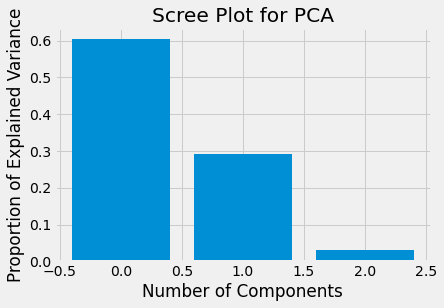

In [16]:
index = np.arange(3)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Explained Variance')